<a href="https://colab.research.google.com/github/shriya999/Swiftshare/blob/master/ML_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1OhLA-Jiwr1frvQ9_si_o8_1fKhsI7QZQ' # URL id.
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('TRAIN_FINAL.csv')
file_id = '1pteIvE2p-ESzU6m1-8kY5NVTw4fCVixY' # URL id.  
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Test_v1.csv')
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('TRAIN_FINAL.csv')
test_data =pd.read_csv('Test_v1.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45612 entries, 0 to 45611
Columns: 370 entries, col_0 to TARGET
dtypes: float64(111), int64(259)
memory usage: 128.8 MB


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Columns: 370 entries, col_0 to index
dtypes: float64(89), int64(281)
memory usage: 28.8 MB


In [0]:
train_data= train_data.astype('float64', copy=False)
test_data=test_data.astype('float64',copy=False)    

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45612 entries, 0 to 45611
Columns: 370 entries, col_0 to TARGET
dtypes: float64(370)
memory usage: 128.8 MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Columns: 370 entries, col_0 to index
dtypes: float64(370)
memory usage: 28.8 MB


In [53]:
index=test_data["index"]
X_test=test_data.drop(["index"],axis=1)
X_test.shape

(10199, 369)

In [54]:
y_train=train_data["TARGET"]
X_train=train_data.drop(["TARGET"],axis=1)
X_train.shape

(45612, 369)

In [55]:
X_train=pd.DataFrame(data=X_train)
cols=X_train.columns
X_test=pd.DataFrame(X_test.values,columns=cols,copy=True)
X_test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_359,col_360,col_361,col_362,col_363,col_364,col_365,col_366,col_367,col_368
0,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45444.060
1,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208922.130
2,2.0,33.0,0.0,75.75,75.75,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60369.900
3,2.0,29.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979
4,2.0,30.0,0.0,47.13,47.13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [0]:
sub = pd.DataFrame()
sub['index'] = index
sub['TARGET'] = np.zeros_like(index)

In [0]:
from sklearn.metrics import roc_curve, auc,recall_score,precision_score

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = metrics.roc_auc_score(labels, preds)
    return 'gini', gini_score

In [0]:
params = {
    'min_child_weight': 10.0,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'eval_metric': 'auc',
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.65,
    'num_boost_round' : 700
    }

In [58]:
from sklearn.model_selection import StratifiedKFold

kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=42)

for i, (train_index, validate_index) in enumerate(skf.split(X_train, y_train)):
      print("TRAIN:", train_index, "TEST:", validate_index)
      X_train_1, X_validate = X_train.iloc[train_index], X_train.iloc[validate_index]
      y_train_1, y_validate = y_train.iloc[train_index], y_train.iloc[validate_index]
      
      X_train_1=pd.DataFrame(data=X_train_1)
      cols=X_train.columns
      X_test=pd.DataFrame(X_test.values,columns=cols,copy=True)
      print(X_test.head())
      
#       d_train = xgb.DMatrix(X_train_1, y_train_1)
#       d_valid = xgb.DMatrix(X_validate, y_validate)
#       d_test = xgb.DMatrix(X_test.values)
      
#       watchlist = [(d_train, 'train'), (d_valid, 'valid')]
      
#       mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=4, maximize=True, verbose_eval=100)
#       print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
#       # Predict on our test data
#       p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
#       sub['TARGET'] += p_test/kfold

TRAIN: [ 9006  9019  9059 ... 45609 45610 45611] TEST: [   0    1    2 ... 9125 9126 9127]
   col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  \
0    2.0   23.0    0.0   0.00   0.00    0.0    0.0    0.0    0.0    0.0   
1    2.0   23.0    0.0   0.00   0.00    0.0    0.0    0.0    0.0    0.0   
2    2.0   33.0    0.0  75.75  75.75    0.0    0.0    0.0    0.0    0.0   
3    2.0   29.0    0.0   0.00   0.00    0.0    0.0    0.0    0.0    0.0   
4    2.0   30.0    0.0  47.13  47.13    0.0    0.0    0.0    0.0    0.0   

      ...      col_359  col_360  col_361  col_362  col_363  col_364  col_365  \
0     ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1     ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     ...          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     ...          0.0      0.0      0.0      0.0      0.0

In [0]:
sub.to_csv('project12.csv', index=False)

In [0]:
uploaded = drive.CreateFile({'title': 'project12.csv'})
uploaded.SetContentFile('project12.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [28]:
print( X_train_1.shape, X_validate.shape, y_train_1.shape, y_validate.shape)

(22807, 369) (22805, 369) (22807,) (22805,)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

/home/shriya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


0.15278682671632718

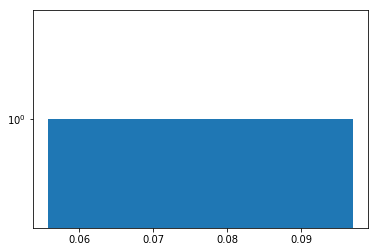

In [0]:
from sklearn.decomposition import PCA

n_components = 30
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(scaled_train)
X_train_pca = pca.transform(scaled_train)
X_test_pca=pca.transform(scaled_test)
plt.hist(pca.explained_variance_ratio_, bins=2, log=True)
pca.explained_variance_ratio_.sum()

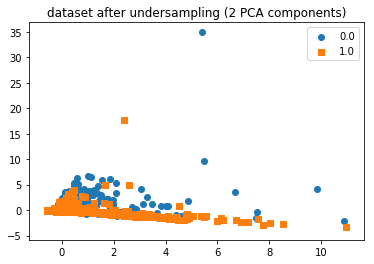

In [0]:
plot_2d_space(X_train_pca, y_train, 'dataset after undersampling (2 PCA components)')

In [0]:
X_train=pd.DataFrame(data=X_train)
cols=X_train.columns
X_test=pd.DataFrame(X_test.values,columns=cols,copy=True)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
0,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45444.060
1,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208922.130
2,2.0,33.0,0.0,75.75,75.75,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60369.900
3,2.0,29.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979
4,2.0,30.0,0.0,47.13,47.13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [0]:
print(X_train.shape,X_test.shape)

(84710, 369) (10199, 369)


In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV

def modelfit(alg, dtrain,y_train,dtest,predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors],y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    preds=alg.predict(dtest[predictors])
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions) )
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob) )
    return preds

In [32]:
#X_train_pca=pd.DataFrame(data=X_train_pca)
#X_test_pca=pd.DataFrame(data=X_test_pca)
predictors = X_train_1.columns
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
y_pred=modelfit(xgb1, X_train_1,y_train_1,X_validate,predictors)


Model Report
Accuracy : 0.9622
AUC Score (Train): 0.890318


In [33]:
from sklearn import metrics

print (metrics.precision_score(y_validate, y_pred))   #precision is the ability of the classifier not to label as positive a sample that is negative
print (metrics.recall_score(y_validate, y_pred) )     #recall is the ability of the classifier to find all the positive samples.
print(metrics.f1_score(y_validate, y_pred) ) 

0.375
0.00340522133938706
0.006749156355455569


In [0]:
index=index.astype("int64")

In [0]:
submission = pd.DataFrame({"index":index,"TARGET":preds})
submission.to_csv('project_10.csv', index=False)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train_1, y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_1,y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]  

In [0]:
from sklearn.ensemble import BaggingClassifier
#TODO

bag_clf = BaggingClassifier(clf)
bag_clf.fit(X_train_1,y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train_1,y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]   

/home/shriya/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.ensemble import ExtraTreesClassifier

clf=ExtraTreesClassifier()
clf.fit(X_train_1,y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]

In [0]:
from sklearn.ensemble import AdaBoostClassifier 

clf=AdaBoostClassifier().fit(X_train_1,y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier().fit(X_train_1,y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]

In [0]:
from xgboost import XGBClassifier

clf =XGBClassifier(silent=True,booster="gbtree",scale_pos_weight=1,learning_rate=0.01,colsample_bytree = 0.8,
                      subsample = 0.8,objective='binary:logistic',n_estimators=200, 
                      reg_alpha = 0.3,max_depth=6,gamma=10)
clf.fit(X_train_1,y_train_1)
y_prob = clf.predict_proba(X_validate)[:,1]

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = np.where(y_prob > 0.5,1,0)
accuracy=roc_auc_score(y_validate,y_pred)
print (accuracy)

0.5


In [0]:
y_pred=clf.predict(X_test_pca)
submission = pd.DataFrame({"index":index,"TARGET":y_pred})
submission.to_csv('project_5.csv', index=False)

/home/shriya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
